#### Student Exams Score - Data Analysis - EDA
#### Author:     Asad Ur Rehman
#### Website:    www.asad195@carrd.co

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# improting dataset as df

df = pd.read_csv("Expanded_data_with_more_features.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
# Exploring Data

df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
# Getting Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
# Checking null values

df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# Droping extra columns

df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Gender Distribution

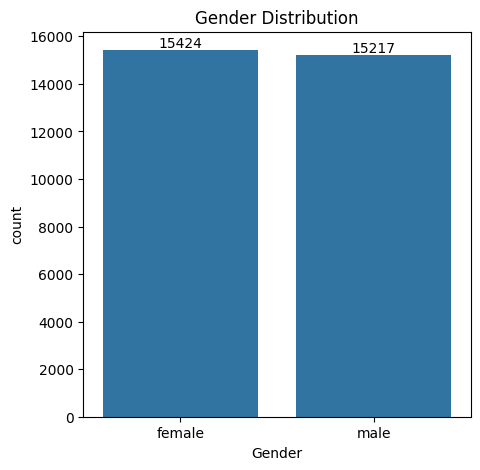

In [24]:
# Gender Distribution
plt.figure(figsize= (5, 5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

##### From the **Gender Distribution** chart we analyize that number of females are more then males in this dataset

### Ethnic Group Distribution

In [95]:
# Checking unique values
df.EthnicGroup.unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

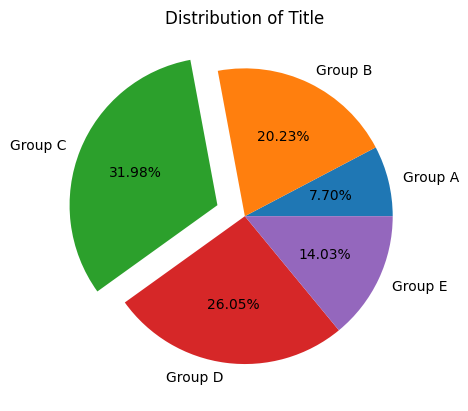

In [114]:
from cProfile import label
from matplotlib import legend


groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC =  df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
mlist = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup'], ]
explode = (0, 0, 0.2, 0, 0)

plt.pie(x= mlist, labels= l, explode= explode, autopct= '%1.2f%%')
plt.title('Distribution of Title')
plt.show()

### Analyizing Based on different groups

In [15]:
# Analysiing parents education impact on student education

gb = df.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore' : 'mean', 'WritingScore' : 'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


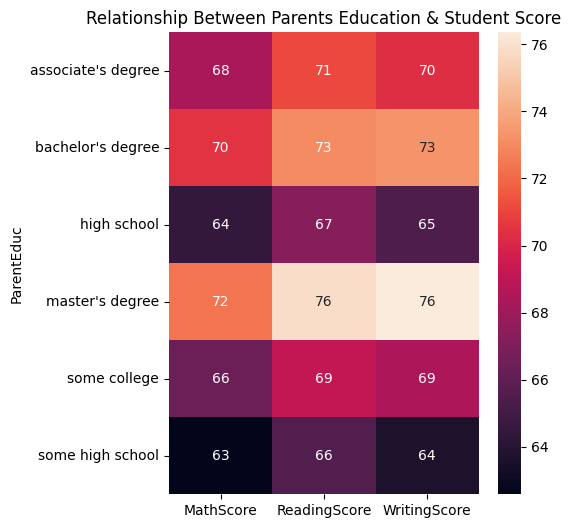

In [30]:
# ploting parents education data

plt.figure(figsize= (5, 6))
sns.heatmap(gb, annot= True)
plt.title('Relationship Between Parents Education & Student Score')
plt.show()

##### From Parents Education we have analyize that students parents education do have **Good Impact** on student educational score.

In [23]:
# Analyzing based on parents material status

pms = df.groupby('ParentMaritalStatus').agg({'MathScore': 'mean', 'ReadingScore' : 'mean', 'WritingScore' : 'mean'})
pms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


<function matplotlib.pyplot.show(close=None, block=None)>

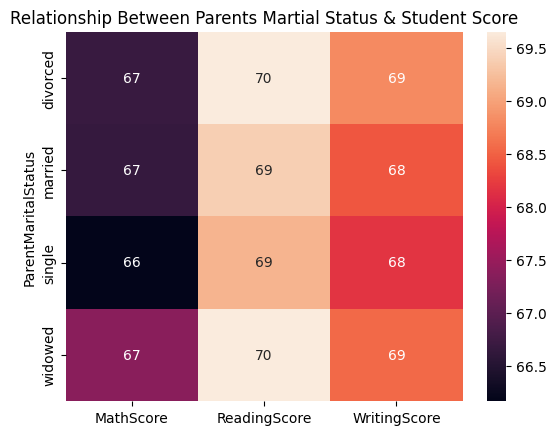

In [31]:
sns.heatmap(pms, annot= True)
plt.title('Relationship Between Parents Martial Status & Student Score')
plt.show

##### From Parents Martial Status we have analyize that students Martial Status **don't have any big Impact** on student educational score.

In [32]:
ps = df.groupby('PracticeSport').agg({'MathScore': 'mean', 'ReadingScore' : 'mean', 'WritingScore' : 'mean'})
ps

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


<function matplotlib.pyplot.show(close=None, block=None)>

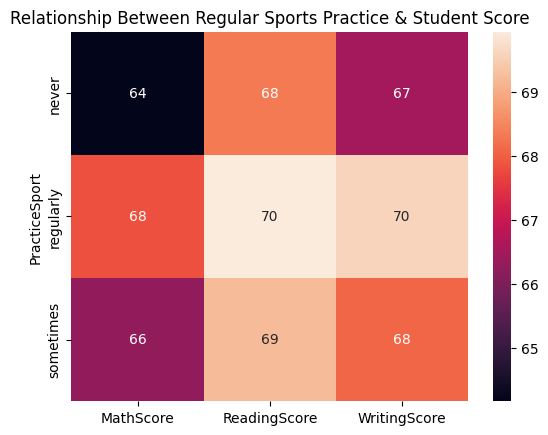

In [35]:
sns.heatmap(ps, annot=True)
plt.title('Relationship Between Regular Sports Practice & Student Score')
plt.show

##### In Relationship Between Regular Sports Practice & Student Score Chart we can see that those students who do sport practice on regluar basis have **Good Score** then others who don't.

In [38]:
df.WklyStudyHours.unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [65]:
wsh = df.groupby('WklyStudyHours').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
wsh

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


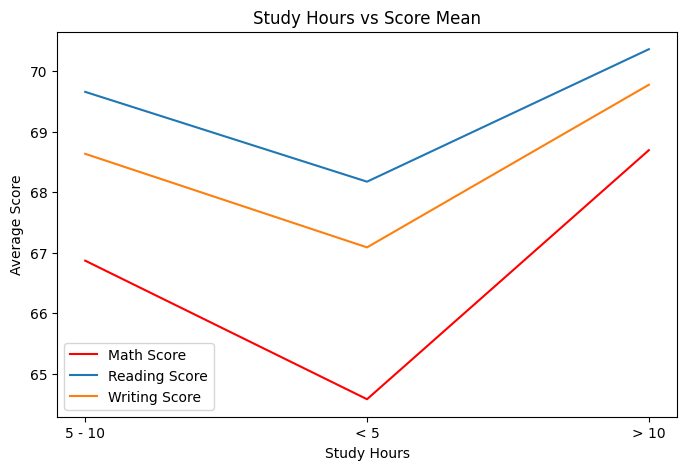

In [66]:

plt.figure(figsize= (8,5))

sns.lineplot(x= 'WklyStudyHours', y='MathScore', data=wsh, label='Math Score', color='Red')
sns.lineplot(x = 'WklyStudyHours', y= 'ReadingScore', data=wsh, label = 'Reading Score' )
sns.lineplot(x='WklyStudyHours', y= 'WritingScore', data=wsh, label= 'Writing Score')

plt.title('Study Hours vs Score Mean')
plt.xlabel('Study Hours')
plt.ylabel('Average Score')
plt.show()


##### In Study Hours vs Score Mean Chart we can see that those students who study more hours have **Good Score** then others who don't.

### Checking Outliers in Math, Reading and Writing Score

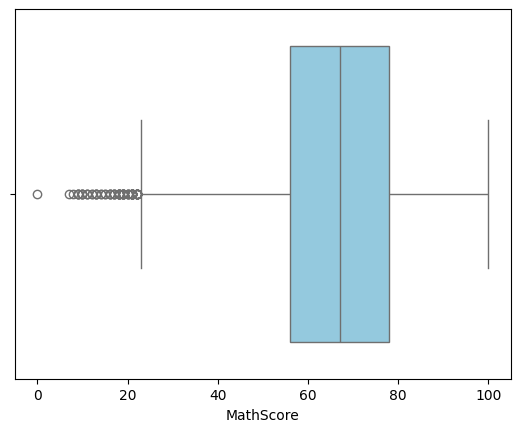

In [93]:
# Math Outliers

sns.boxplot(data = df, x= 'MathScore', color='SkyBlue')
plt.show()

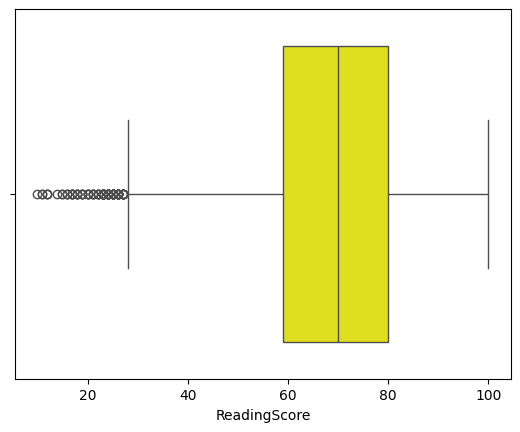

In [88]:
# Reading Outliers

from cProfile import label


sns.boxplot(data= df, x='ReadingScore', color='Yellow')
plt.show()

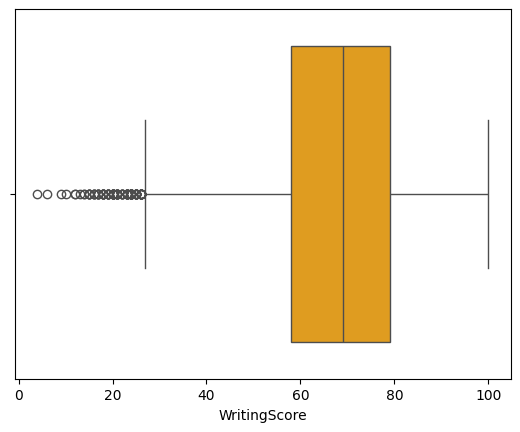

In [81]:
# Writing Outliers

sns.boxplot(data=df, x='WritingScore', color='Orange')
plt.show()